In [1]:
import requests
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
import datetime as dt
import pytz

import matplotlib.pyplot as plt

pd.set_option('future.no_silent_downcasting', True)

In [2]:
# locked with onecall
API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
city = 'paris'
base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
current = requests.get(base_url).json()
lat = current['coord']['lat']
lon = current['coord']['lon']

In [3]:
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
try:
    onecall_data = requests.get(base_url).json()
except:
    exit()

In [4]:
onecall_data

{'cod': 401,
 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}

In [5]:
def human_date(d):
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S') 

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

In [6]:
df = onecall_data['daily']
current = onecall_data['current']
current

KeyError: 'daily'

In [ ]:
len(current)

13

In [ ]:
human_date(current['dt']),get_date(current['dt']),get_time(current['dt'])

('31/10/2024 19:13:48', '31/10/2024', '19:13:48')

In [ ]:
day1 = df[0]
day1

NameError: name 'df' is not defined

In [ ]:
import json
print(json.dumps(day1, indent=4))

NameError: name 'day1' is not defined

In [ ]:
# Serializing json
json_object = json.dumps(day1, indent=4)
 
# Writing to sample.json
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [ ]:
# get data from list of dicts
_8days = pd.DataFrame.from_records(df)
_8days.loc[0]

dt                                                   1725534000
sunrise                                              1725513215
sunset                                               1725560715
moonrise                                             1725521640
moonset                                              1725563340
moon_phase                                                 0.07
temp          {'day': 15.31, 'min': 15.16, 'max': 19.65, 'ni...
feels_like    {'day': 15.32, 'night': 15.3, 'eve': 15.61, 'm...
pressure                                                   1009
humidity                                                     93
dew_point                                                 13.92
wind_speed                                                 4.41
wind_deg                                                    286
wind_gust                                                 10.31
weather       [{'id': 502, 'main': 'Rain', 'description': 'h...
clouds                                  

In [ ]:
for k in _8days.keys()[:5]:
    print(k,':',human_date(_8days.loc[0][k]))

dt : 05/09/2024 13:00:00
sunrise : 05/09/2024 07:13:35
sunset : 05/09/2024 20:25:15
moonrise : 05/09/2024 09:34:00
moonset : 05/09/2024 21:09:00


In [ ]:
_8days.loc[0].temp.keys(), len(_8days.loc[0])

(dict_keys(['day', 'min', 'max', 'night', 'eve', 'morn']), 19)

In [ ]:
_8days.loc[0].feels_like.keys()

dict_keys(['day', 'night', 'eve', 'morn'])

In [ ]:
# weather is a list of dictionaries
_8days.loc[0].weather[0]

{'id': 502,
 'main': 'Rain',
 'description': 'heavy intensity rain',
 'icon': '10d'}

In [ ]:
for key in _8days.loc[0].weather[0].keys():
    _8days[key]=_8days.loc[0].weather[0][key]
for key in _8days.loc[0].temp.keys():
    _8days[key]=_8days.loc[0].temp[key]
for key in _8days.loc[0].feels_like.keys():
    key2 = "fl_"+key
    #print(type(key))
    _8days[key2]=_8days.loc[0].feels_like[key]

In [ ]:
_8days.loc[0]

dt                                                    1725534000
sunrise                                               1725513215
sunset                                                1725560715
moonrise                                              1725521640
moonset                                               1725563340
moon_phase                                                  0.07
temp           {'day': 15.31, 'min': 15.16, 'max': 19.65, 'ni...
feels_like     {'day': 15.32, 'night': 15.3, 'eve': 15.61, 'm...
pressure                                                    1009
humidity                                                      93
dew_point                                                  13.92
wind_speed                                                  4.41
wind_deg                                                     286
wind_gust                                                  10.31
weather        [{'id': 502, 'main': 'Rain', 'description': 'h...
clouds                   

In [ ]:
_8days = _8days.drop(['temp','feels_like','weather'],axis=1)
_8days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           8 non-null      int64  
 1   sunrise      8 non-null      int64  
 2   sunset       8 non-null      int64  
 3   moonrise     8 non-null      int64  
 4   moonset      8 non-null      int64  
 5   moon_phase   8 non-null      float64
 6   pressure     8 non-null      int64  
 7   humidity     8 non-null      int64  
 8   dew_point    8 non-null      float64
 9   wind_speed   8 non-null      float64
 10  wind_deg     8 non-null      int64  
 11  wind_gust    8 non-null      float64
 12  clouds       8 non-null      int64  
 13  pop          8 non-null      int64  
 14  rain         6 non-null      float64
 15  uvi          8 non-null      float64
 16  id           8 non-null      int64  
 17  main         8 non-null      object 
 18  description  8 non-null      object 
 19  icon        

In [ ]:
#__8days[['dt','sunrise','sunset']]= pd.to_datetime(__8days[['dt','sunrise','sunset']], infer_datetime_format=True)
#df['dt'].apply(lambda x: x.date())
#__8days['dt'] = __8days['dt'].apply(lambda x: x.datetime64())

In [ ]:
_8days['depression']=_8days['day']-_8days['dew_point']

In [ ]:
_8days.keys()

Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase',
       'pressure', 'humidity', 'dew_point', 'wind_speed', 'wind_deg',
       'wind_gust', 'clouds', 'pop', 'rain', 'uvi', 'id', 'main',
       'description', 'icon', 'day', 'min', 'max', 'night', 'eve', 'morn',
       'fl_day', 'fl_night', 'fl_eve', 'fl_morn', 'depression'],
      dtype='object')

In [ ]:
_8days.loc[0]

dt                       1725534000
sunrise                  1725513215
sunset                   1725560715
moonrise                 1725521640
moonset                  1725563340
moon_phase                     0.07
pressure                       1009
humidity                         93
dew_point                     13.92
wind_speed                     4.41
wind_deg                        286
wind_gust                     10.31
clouds                          100
pop                               1
rain                          37.37
uvi                            1.31
id                              502
main                           Rain
description    heavy intensity rain
icon                            10d
day                           15.31
min                           15.16
max                           19.65
night                         15.45
eve                           15.78
morn                           15.6
fl_day                        15.32
fl_night                    

In [ ]:
# columns with dates
_8days.keys()[:5]

Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset'], dtype='object')

In [ ]:
_8days.loc[0]

dt                       1725534000
sunrise                  1725513215
sunset                   1725560715
moonrise                 1725521640
moonset                  1725563340
moon_phase                     0.07
pressure                       1009
humidity                         93
dew_point                     13.92
wind_speed                     4.41
wind_deg                        286
wind_gust                     10.31
clouds                          100
pop                               1
rain                          37.37
uvi                            1.31
id                              502
main                           Rain
description    heavy intensity rain
icon                            10d
day                           15.31
min                           15.16
max                           19.65
night                         15.45
eve                           15.78
morn                           15.6
fl_day                        15.32
fl_night                    

In [ ]:
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)

In [ ]:
_8days

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,...,min,max,night,eve,morn,fl_day,fl_night,fl_eve,fl_morn,depression
0,05/09/2024,07:13:35,20:25:15,09:34:00,21:09:00,0.07,1009,93,13.92,4.41,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,1.39
1,06/09/2024,07:14:59,20:23:09,10:40:00,21:22:00,0.10,1011,49,10.57,3.63,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,4.74
2,07/09/2024,07:16:24,20:21:03,11:49:00,21:37:00,0.13,1008,44,12.27,5.97,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,3.04
3,08/09/2024,07:17:48,20:18:56,12:59:00,21:55:00,0.16,1008,71,13.23,6.96,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,2.08
4,09/09/2024,07:19:13,20:16:49,14:11:00,22:18:00,0.19,1010,70,13.78,5.52,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,1.53
5,10/09/2024,07:20:37,20:14:42,15:23:00,22:51:00,0.22,1016,44,7.73,3.85,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,7.58
6,11/09/2024,07:22:01,20:12:34,16:30:00,23:37:00,0.25,1011,81,14.08,5.08,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,1.23
7,12/09/2024,07:23:25,20:10:27,17:29:00,01:00:00,0.29,1018,38,2.37,5.63,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,12.94


The format of the JSON string:

‘split’ : dict like {‘index’ -> [index], ‘columns’ -> [columns], ‘data’ -> [values]}

‘records’ : list like [{column -> value}, … , {column -> value}]

‘index’ : dict like {index -> {column -> value}}

‘columns’ : dict like {column -> {index -> value}}

‘values’ : just the values array

‘table’ : dict like {‘schema’: {schema}, ‘data’: {data}}

In [ ]:
# save dataframe to csv file
_8days.to_csv('8days.csv', index=False)

In [ ]:
# save as json file
with open("8days_to_json.json", "w") as outfile:
    _8days.to_json(outfile)

In [ ]:
# read from json file to dataframe
with open("8days_to_json.json", "r") as outfile:
    result=pd.read_json(outfile)
result

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,...,min,max,night,eve,morn,fl_day,fl_night,fl_eve,fl_morn,depression
0,05/09/2024,07:13:35,20:25:15,09:34:00,21:09:00,0.07,1009,93,13.92,4.41,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,1.39
1,06/09/2024,07:14:59,20:23:09,10:40:00,21:22:00,0.10,1011,49,10.57,3.63,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,4.74
2,07/09/2024,07:16:24,20:21:03,11:49:00,21:37:00,0.13,1008,44,12.27,5.97,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,3.04
3,08/09/2024,07:17:48,20:18:56,12:59:00,21:55:00,0.16,1008,71,13.23,6.96,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,2.08
4,09/09/2024,07:19:13,20:16:49,14:11:00,22:18:00,0.19,1010,70,13.78,5.52,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,1.53
5,10/09/2024,07:20:37,20:14:42,15:23:00,22:51:00,0.22,1016,44,7.73,3.85,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,7.58
6,11/09/2024,07:22:01,20:12:34,16:30:00,23:37:00,0.25,1011,81,14.08,5.08,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,1.23
7,12/09/2024,07:23:25,20:10:27,17:29:00,01:00:00,0.29,1018,38,2.37,5.63,...,15.16,19.65,15.45,15.78,15.6,15.32,15.3,15.61,15.51,12.94


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html#pandas.DataFrame.to_dict
result = _8days.to_dict('records')
result[0]

{'dt': '05/09/2024',
 'sunrise': '07:13:35',
 'sunset': '20:25:15',
 'moonrise': '09:34:00',
 'moonset': '21:09:00',
 'moon_phase': 0.07,
 'pressure': 1009,
 'humidity': 93,
 'dew_point': 13.92,
 'wind_speed': 4.41,
 'wind_deg': 286,
 'wind_gust': 10.31,
 'clouds': 100,
 'pop': 1,
 'rain': 37.37,
 'uvi': 1.31,
 'id': 502,
 'main': 'Rain',
 'description': 'heavy intensity rain',
 'icon': '10d',
 'day': 15.31,
 'min': 15.16,
 'max': 19.65,
 'night': 15.45,
 'eve': 15.78,
 'morn': 15.6,
 'fl_day': 15.32,
 'fl_night': 15.3,
 'fl_eve': 15.61,
 'fl_morn': 15.51,
 'depression': 1.3900000000000006}

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html#pandas.DataFrame.to_json
result = _8days.to_json(orient="records")
print(result)
result = _8days.to_json(orient="split")
print(result)

[{"dt":"05\/09\/2024","sunrise":"07:13:35","sunset":"20:25:15","moonrise":"09:34:00","moonset":"21:09:00","moon_phase":0.07,"pressure":1009,"humidity":93,"dew_point":13.92,"wind_speed":4.41,"wind_deg":286,"wind_gust":10.31,"clouds":100,"pop":1,"rain":37.37,"uvi":1.31,"id":502,"main":"Rain","description":"heavy intensity rain","icon":"10d","day":15.31,"min":15.16,"max":19.65,"night":15.45,"eve":15.78,"morn":15.6,"fl_day":15.32,"fl_night":15.3,"fl_eve":15.61,"fl_morn":15.51,"depression":1.39},{"dt":"06\/09\/2024","sunrise":"07:14:59","sunset":"20:23:09","moonrise":"10:40:00","moonset":"21:22:00","moon_phase":0.1,"pressure":1011,"humidity":49,"dew_point":10.57,"wind_speed":3.63,"wind_deg":121,"wind_gust":10.21,"clouds":100,"pop":0,"rain":null,"uvi":4.85,"id":502,"main":"Rain","description":"heavy intensity rain","icon":"10d","day":15.31,"min":15.16,"max":19.65,"night":15.45,"eve":15.78,"morn":15.6,"fl_day":15.32,"fl_night":15.3,"fl_eve":15.61,"fl_morn":15.51,"depression":4.74},{"dt":"07\/

In [ ]:
# save as json file
with open("8days_dump.json", "w") as outfile:
    json.dump(result, outfile)

# Other way to select columns

In [ ]:
df

[{'dt': 1725534000,
  'sunrise': 1725513215,
  'sunset': 1725560715,
  'moonrise': 1725521640,
  'moonset': 1725563340,
  'moon_phase': 0.07,
  'temp': {'day': 15.31,
   'min': 15.16,
   'max': 19.65,
   'night': 15.45,
   'eve': 15.78,
   'morn': 15.6},
  'feels_like': {'day': 15.32, 'night': 15.3, 'eve': 15.61, 'morn': 15.51},
  'pressure': 1009,
  'humidity': 93,
  'dew_point': 13.92,
  'wind_speed': 4.41,
  'wind_deg': 286,
  'wind_gust': 10.31,
  'weather': [{'id': 502,
    'main': 'Rain',
    'description': 'heavy intensity rain',
    'icon': '10d'}],
  'clouds': 100,
  'pop': 1,
  'rain': 37.37,
  'uvi': 1.31},
 {'dt': 1725620400,
  'sunrise': 1725599699,
  'sunset': 1725646989,
  'moonrise': 1725612000,
  'moonset': 1725650520,
  'moon_phase': 0.1,
  'temp': {'day': 21.8,
   'min': 14.74,
   'max': 24.42,
   'night': 20.54,
   'eve': 23.82,
   'morn': 14.74},
  'feels_like': {'day': 21.31, 'night': 20.11, 'eve': 23.41, 'morn': 14.41},
  'pressure': 1011,
  'humidity': 49,
  'de

In [ ]:
_8days = pd.DataFrame.from_records(df)
_8days.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          8 non-null      int64  
 1   sunrise     8 non-null      int64  
 2   sunset      8 non-null      int64  
 3   moonrise    8 non-null      int64  
 4   moonset     8 non-null      int64  
 5   moon_phase  8 non-null      float64
 6   temp        8 non-null      object 
 7   feels_like  8 non-null      object 
 8   pressure    8 non-null      int64  
 9   humidity    8 non-null      int64  
 10  dew_point   8 non-null      float64
 11  wind_speed  8 non-null      float64
 12  wind_deg    8 non-null      int64  
 13  wind_gust   8 non-null      float64
 14  weather     8 non-null      object 
 15  clouds      8 non-null      int64  
 16  pop         8 non-null      int64  
 17  rain        6 non-null      float64
 18  uvi         8 non-null      float64
dtypes: float64(6), int64(10), object(

In [ ]:
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)

In [ ]:
_8days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          8 non-null      object 
 1   sunrise     8 non-null      object 
 2   sunset      8 non-null      object 
 3   moonrise    8 non-null      object 
 4   moonset     8 non-null      object 
 5   moon_phase  8 non-null      float64
 6   temp        8 non-null      object 
 7   feels_like  8 non-null      object 
 8   pressure    8 non-null      int64  
 9   humidity    8 non-null      int64  
 10  dew_point   8 non-null      float64
 11  wind_speed  8 non-null      float64
 12  wind_deg    8 non-null      int64  
 13  wind_gust   8 non-null      float64
 14  weather     8 non-null      object 
 15  clouds      8 non-null      int64  
 16  pop         8 non-null      int64  
 17  rain        6 non-null      float64
 18  uvi         8 non-null      float64
dtypes: float64(6), int64(5), object(8

In [ ]:
_8days = pd.DataFrame.from_records(df)
# convert int64 to timestamp
_8days['dt'] = _8days['dt'].apply(pd.Timestamp.fromtimestamp)
_8days['sunrise'] = _8days['sunrise'].apply(pd.Timestamp.fromtimestamp)
_8days['sunset'] = _8days['sunset'].apply(pd.Timestamp.fromtimestamp)
_8days['moonrise'] = _8days['moonrise'].apply(pd.Timestamp.fromtimestamp)
_8days['moonset'] = _8days['moonset'].apply(pd.Timestamp.fromtimestamp)
_8days[['dt','sunrise','sunset','moonrise','moonset']]



,dt,sunrise,sunset,moonrise,moonset
0,2024-09-05 13:00:00,2024-09-05 07:13:35,2024-09-05 20:25:15,2024-09-05 09:34:00,2024-09-05 21:09:00
1,2024-09-06 13:00:00,2024-09-06 07:14:59,2024-09-06 20:23:09,2024-09-06 10:40:00,2024-09-06 21:22:00
2,2024-09-07 13:00:00,2024-09-07 07:16:24,2024-09-07 20:21:03,2024-09-07 11:49:00,2024-09-07 21:37:00
3,2024-09-08 13:00:00,2024-09-08 07:17:48,2024-09-08 20:18:56,2024-09-08 12:59:00,2024-09-08 21:55:00
4,2024-09-09 13:00:00,2024-09-09 07:19:13,2024-09-09 20:16:49,2024-09-09 14:11:00,2024-09-09 22:18:00
5,2024-09-10 13:00:00,2024-09-10 07:20:37,2024-09-10 20:14:42,2024-09-10 15:23:00,2024-09-10 22:51:00
6,2024-09-11 13:00:00,2024-09-11 07:22:01,2024-09-11 20:12:34,2024-09-11 16:30:00,2024-09-11 23:37:00
7,2024-09-12 13:00:00,2024-09-12 07:23:25,2024-09-12 20:10:27,2024-09-12 17:29:00,1970-01-01 01:00:00


In [ ]:
# number of keys may change
l = len(_8days.iloc[0])

# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus
focus_idx =_8days.keys()[focus]
focus_idx
status2 = pd.DataFrame(_8days[focus_idx])
status2

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,pop,rain,uvi
0,2024-09-05 13:00:00,2024-09-05 07:13:35,2024-09-05 20:25:15,2024-09-05 09:34:00,2024-09-05 21:09:00,0.07,1009,93,13.92,4.41,286,10.31,1,37.37,1.31
1,2024-09-06 13:00:00,2024-09-06 07:14:59,2024-09-06 20:23:09,2024-09-06 10:40:00,2024-09-06 21:22:00,0.10,1011,49,10.57,3.63,121,10.21,0,NaN,4.85
2,2024-09-07 13:00:00,2024-09-07 07:16:24,2024-09-07 20:21:03,2024-09-07 11:49:00,2024-09-07 21:37:00,0.13,1008,44,12.27,5.97,246,11.52,1,6.69,4.58
3,2024-09-08 13:00:00,2024-09-08 07:17:48,2024-09-08 20:18:56,2024-09-08 12:59:00,2024-09-08 21:55:00,0.16,1008,71,13.23,6.96,186,13.86,1,5.13,1.90
4,2024-09-09 13:00:00,2024-09-09 07:19:13,2024-09-09 20:16:49,2024-09-09 14:11:00,2024-09-09 22:18:00,0.19,1010,70,13.78,5.52,223,11.99,1,8.06,4.15
5,2024-09-10 13:00:00,2024-09-10 07:20:37,2024-09-10 20:14:42,2024-09-10 15:23:00,2024-09-10 22:51:00,0.22,1016,44,7.73,3.85,254,8.30,0,NaN,4.65
6,2024-09-11 13:00:00,2024-09-11 07:22:01,2024-09-11 20:12:34,2024-09-11 16:30:00,2024-09-11 23:37:00,0.25,1011,81,14.08,5.08,231,11.83,1,14.46,5.00
7,2024-09-12 13:00:00,2024-09-12 07:23:25,2024-09-12 20:10:27,2024-09-12 17:29:00,1970-01-01 01:00:00,0.29,1018,38,2.37,5.63,324,10.22,1,1.17,5.00


In [ ]:
_8days[["dt", "sunrise", "sunset"]]

,dt,sunrise,sunset
0,2024-09-05 13:00:00,2024-09-05 07:13:35,2024-09-05 20:25:15
1,2024-09-06 13:00:00,2024-09-06 07:14:59,2024-09-06 20:23:09
2,2024-09-07 13:00:00,2024-09-07 07:16:24,2024-09-07 20:21:03
3,2024-09-08 13:00:00,2024-09-08 07:17:48,2024-09-08 20:18:56
4,2024-09-09 13:00:00,2024-09-09 07:19:13,2024-09-09 20:16:49
5,2024-09-10 13:00:00,2024-09-10 07:20:37,2024-09-10 20:14:42
6,2024-09-11 13:00:00,2024-09-11 07:22:01,2024-09-11 20:12:34
7,2024-09-12 13:00:00,2024-09-12 07:23:25,2024-09-12 20:10:27


In [ ]:
_8days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dt          8 non-null      datetime64[ns]
 1   sunrise     8 non-null      datetime64[ns]
 2   sunset      8 non-null      datetime64[ns]
 3   moonrise    8 non-null      datetime64[ns]
 4   moonset     8 non-null      datetime64[ns]
 5   moon_phase  8 non-null      float64       
 6   temp        8 non-null      object        
 7   feels_like  8 non-null      object        
 8   pressure    8 non-null      int64         
 9   humidity    8 non-null      int64         
 10  dew_point   8 non-null      float64       
 11  wind_speed  8 non-null      float64       
 12  wind_deg    8 non-null      int64         
 13  wind_gust   8 non-null      float64       
 14  weather     8 non-null      object        
 15  clouds      8 non-null      int64         
 16  pop         8 non-null      in

In [ ]:
_8days.T

,0,1,2,3,4,5,6,7
dt,2024-09-05 13:00:00,2024-09-06 13:00:00,2024-09-07 13:00:00,2024-09-08 13:00:00,2024-09-09 13:00:00,2024-09-10 13:00:00,2024-09-11 13:00:00,2024-09-12 13:00:00
sunrise,2024-09-05 07:13:35,2024-09-06 07:14:59,2024-09-07 07:16:24,2024-09-08 07:17:48,2024-09-09 07:19:13,2024-09-10 07:20:37,2024-09-11 07:22:01,2024-09-12 07:23:25
sunset,2024-09-05 20:25:15,2024-09-06 20:23:09,2024-09-07 20:21:03,2024-09-08 20:18:56,2024-09-09 20:16:49,2024-09-10 20:14:42,2024-09-11 20:12:34,2024-09-12 20:10:27
moonrise,2024-09-05 09:34:00,2024-09-06 10:40:00,2024-09-07 11:49:00,2024-09-08 12:59:00,2024-09-09 14:11:00,2024-09-10 15:23:00,2024-09-11 16:30:00,2024-09-12 17:29:00
moonset,2024-09-05 21:09:00,2024-09-06 21:22:00,2024-09-07 21:37:00,2024-09-08 21:55:00,2024-09-09 22:18:00,2024-09-10 22:51:00,2024-09-11 23:37:00,1970-01-01 01:00:00
moon_phase,0.07,0.1,0.13,0.16,0.19,0.22,0.25,0.29
temp,"{'day': 15.31, 'min': 15.16, 'max': 19.65, 'ni...","{'day': 21.8, 'min': 14.74, 'max': 24.42, 'nig...","{'day': 25.57, 'min': 17.19, 'max': 27.82, 'ni...","{'day': 18.95, 'min': 15.09, 'max': 19.13, 'ni...","{'day': 19.64, 'min': 16.07, 'max': 19.64, 'ni...","{'day': 20.58, 'min': 14.78, 'max': 21.75, 'ni...","{'day': 17.75, 'min': 16.13, 'max': 17.75, 'ni...","{'day': 16.96, 'min': 12.45, 'max': 17.43, 'ni..."
feels_like,"{'day': 15.32, 'night': 15.3, 'eve': 15.61, 'm...","{'day': 21.31, 'night': 20.11, 'eve': 23.41, '...","{'day': 25.33, 'night': 17.13, 'eve': 18.44, '...","{'day': 18.75, 'night': 16.64, 'eve': 17.84, '...","{'day': 19.49, 'night': 16.74, 'eve': 18.28, '...","{'day': 19.84, 'night': 17.35, 'eve': 18.18, '...","{'day': 17.7, 'night': 16.4, 'eve': 16.33, 'mo...","{'day': 15.7, 'night': 12.45, 'eve': 13.74, 'm..."
pressure,1009,1011,1008,1008,1010,1016,1011,1018
humidity,93,49,44,71,70,44,81,38


In [ ]:
# Create DataFrame
import pandas as pd
from datetime import datetime, timedelta
from pandas import DataFrame
df = DataFrame.from_dict(
      {'Courses':["Spark","Hadoop","pandas"],
     'Fee' :[20000,25000,30000],
     'Duration':['30days','40days','35days'],
     'Discount':[1000,2500,1500],
     'Inserted': ["10/02/2021, 10:39:24","09/12/2021, 08:09:24","01/22/2021, 10:29:14"],
     'Updated':  ["11/12/2021, 11:39:24","10/22/2021, 10:39:34","05/12/2021, 04:49:04"]},
    orient='index', 
    columns=['A', 'B', 'C']).T
df
df.info()
# Use DataFrame.apply() to convert multiple columns to datetime
df[['Inserted','Updated']] = df[['Inserted','Updated']].apply(pd.to_datetime)
print(" After converting multiple columns to datetime:\n", df)

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Courses   3 non-null      object
 1   Fee       3 non-null      object
 2   Duration  3 non-null      object
 3   Discount  3 non-null      object
 4   Inserted  3 non-null      object
 5   Updated   3 non-null      object
dtypes: object(6)
memory usage: 168.0+ bytes
 After converting multiple columns to datetime:
   Courses    Fee Duration Discount            Inserted             Updated
A   Spark  20000   30days     1000 2021-10-02 10:39:24 2021-11-12 11:39:24
B  Hadoop  25000   40days     2500 2021-09-12 08:09:24 2021-10-22 10:39:34
C  pandas  30000   35days     1500 2021-01-22 10:29:14 2021-05-12 04:49:04


In [ ]:
'''
for k in status2.keys()[:5]:
    #print(k)
    if k=='dt':
        status2[k] = status2[k].apply(get_date)
    else:
        status2[k] = status2[k].apply(get_time)
'''

"\nfor k in status2.keys()[:5]:\n    #print(k)\n    if k=='dt':\n        status2[k] = status2[k].apply(get_date)\n    else:\n        status2[k] = status2[k].apply(get_time)\n"

In [ ]:
week = status2.T
# pop = Probability of precipitation
# rain in mm
# uvi W/m²
week

,0,1,2,3,4,5,6,7
dt,2024-09-05 13:00:00,2024-09-06 13:00:00,2024-09-07 13:00:00,2024-09-08 13:00:00,2024-09-09 13:00:00,2024-09-10 13:00:00,2024-09-11 13:00:00,2024-09-12 13:00:00
sunrise,2024-09-05 07:13:35,2024-09-06 07:14:59,2024-09-07 07:16:24,2024-09-08 07:17:48,2024-09-09 07:19:13,2024-09-10 07:20:37,2024-09-11 07:22:01,2024-09-12 07:23:25
sunset,2024-09-05 20:25:15,2024-09-06 20:23:09,2024-09-07 20:21:03,2024-09-08 20:18:56,2024-09-09 20:16:49,2024-09-10 20:14:42,2024-09-11 20:12:34,2024-09-12 20:10:27
moonrise,2024-09-05 09:34:00,2024-09-06 10:40:00,2024-09-07 11:49:00,2024-09-08 12:59:00,2024-09-09 14:11:00,2024-09-10 15:23:00,2024-09-11 16:30:00,2024-09-12 17:29:00
moonset,2024-09-05 21:09:00,2024-09-06 21:22:00,2024-09-07 21:37:00,2024-09-08 21:55:00,2024-09-09 22:18:00,2024-09-10 22:51:00,2024-09-11 23:37:00,1970-01-01 01:00:00
moon_phase,0.07,0.1,0.13,0.16,0.19,0.22,0.25,0.29
pressure,1009,1011,1008,1008,1010,1016,1011,1018
humidity,93,49,44,71,70,44,81,38
dew_point,13.92,10.57,12.27,13.23,13.78,7.73,14.08,2.37
wind_speed,4.41,3.63,5.97,6.96,5.52,3.85,5.08,5.63


In [ ]:
#week.loc['dt'].dt.strftime('%Y-%m-%d')

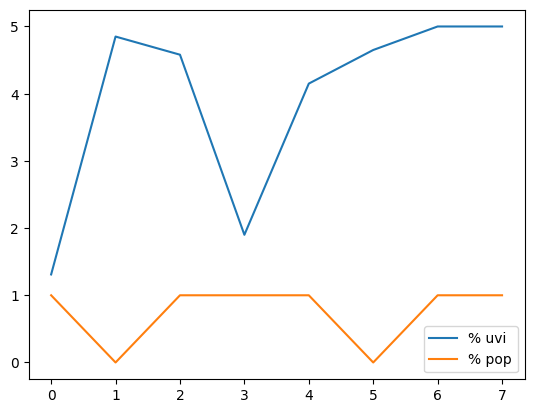

In [ ]:
# pd.set_option('future.no_silent_downcasting', True)
week.fillna(0)
#week.loc['rain'].fillna(0).plot(label='% rain')
week.loc['uvi'].fillna(0).plot(label='% uvi')
week.loc['pop'].fillna(0).plot(label='% pop')  # pop = Probability of precipitation
plt.legend()

In [ ]:
week.to_csv('week.csv')

In [ ]:
status2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dt          8 non-null      datetime64[ns]
 1   sunrise     8 non-null      datetime64[ns]
 2   sunset      8 non-null      datetime64[ns]
 3   moonrise    8 non-null      datetime64[ns]
 4   moonset     8 non-null      datetime64[ns]
 5   moon_phase  8 non-null      float64       
 6   pressure    8 non-null      int64         
 7   humidity    8 non-null      int64         
 8   dew_point   8 non-null      float64       
 9   wind_speed  8 non-null      float64       
 10  wind_deg    8 non-null      int64         
 11  wind_gust   8 non-null      float64       
 12  pop         8 non-null      int64         
 13  rain        6 non-null      float64       
 14  uvi         8 non-null      float64       
dtypes: datetime64[ns](5), float64(6), int64(4)
memory usage: 1.1 KB


In [ ]:
# aujourd'hui
status2.loc[0]

dt            2024-09-05 13:00:00
sunrise       2024-09-05 07:13:35
sunset        2024-09-05 20:25:15
moonrise      2024-09-05 09:34:00
moonset       2024-09-05 21:09:00
moon_phase                   0.07
pressure                     1009
humidity                       93
dew_point                   13.92
wind_speed                   4.41
wind_deg                      286
wind_gust                   10.31
pop                             1
rain                        37.37
uvi                          1.31
Name: 0, dtype: object

In [ ]:
demain = status2.loc[1]  # demain
demain

dt            2024-09-06 13:00:00
sunrise       2024-09-06 07:14:59
sunset        2024-09-06 20:23:09
moonrise      2024-09-06 10:40:00
moonset       2024-09-06 21:22:00
moon_phase                    0.1
pressure                     1011
humidity                       49
dew_point                   10.57
wind_speed                   3.63
wind_deg                      121
wind_gust                   10.21
pop                             0
rain                          NaN
uvi                          4.85
Name: 1, dtype: object

In [ ]:
demain.dew_point

10.57

In [ ]:
from string import Formatter
from datetime import timedelta


In [ ]:
def strfdelta(tdelta, fmt='{D:02}d {H:02}h {M:02}m {S:02}s', inputtype='timedelta'):
    """Convert a datetime.timedelta object or a regular number to a custom-
    formatted string, just like the stftime() method does for datetime.datetime
    objects.

    The fmt argument allows custom formatting to be specified.  Fields can 
    include seconds, minutes, hours, days, and weeks.  Each field is optional.

    Some examples:
        '{D:02}d {H:02}h {M:02}m {S:02}s' --> '05d 08h 04m 02s' (default)
        '{W}w {D}d {H}:{M:02}:{S:02}'     --> '4w 5d 8:04:02'
        '{D:2}d {H:2}:{M:02}:{S:02}'      --> ' 5d  8:04:02'
        '{H}h {S}s'                       --> '72h 800s'

    The inputtype argument allows tdelta to be a regular number instead of the  
    default, which is a datetime.timedelta object.  Valid inputtype strings: 
        's', 'seconds', 
        'm', 'minutes', 
        'h', 'hours', 
        'd', 'days', 
        'w', 'weeks'
    """

    # Convert tdelta to integer seconds.
    if inputtype == 'timedelta':
        remainder = int(tdelta.total_seconds())
    elif inputtype in ['s', 'seconds']:
        remainder = int(tdelta)
    elif inputtype in ['m', 'minutes']:
        remainder = int(tdelta)*60
    elif inputtype in ['h', 'hours']:
        remainder = int(tdelta)*3600
    elif inputtype in ['d', 'days']:
        remainder = int(tdelta)*86400
    elif inputtype in ['w', 'weeks']:
        remainder = int(tdelta)*604800

    f = Formatter()
    desired_fields = [field_tuple[1] for field_tuple in f.parse(fmt)]
    possible_fields = ('W', 'D', 'H', 'M', 'S')
    constants = {'W': 604800, 'D': 86400, 'H': 3600, 'M': 60, 'S': 1}
    values = {}
    for field in possible_fields:
        if field in desired_fields and field in constants:
            values[field], remainder = divmod(remainder, constants[field])
    return f.format(fmt, **values)

In [ ]:
demain[['sunrise', 'sunset','moonrise', 'moonset']]

sunrise     2024-09-06 07:14:59
sunset      2024-09-06 20:23:09
moonrise    2024-09-06 10:40:00
moonset     2024-09-06 21:22:00
Name: 1, dtype: object

In [ ]:
delta_rise = strfdelta(demain['moonrise'] - demain['sunrise'])
offset = 'after'

if '-' in delta_rise:
    # get positive delta
    offset = 'before'
    delta_rise = strfdelta(demain['sunrise'] - demain['moonrise'])
print(f'Moon rises {delta_rise} {offset} the sun')

Moon rises 00d 03h 25m 01s after the sun


In [ ]:
delta_set = strfdelta(demain['moonset'] - demain['sunset'])
offset = 'after'

if '-' in delta_set:
    # get positive delta
    offset = 'before'
    delta_set = strfdelta(demain['sunset'] - demain['moonset'])
print(f'Moon sets {delta_set} {offset} the sun')

Moon sets 00d 00h 58m 51s after the sun


In [ ]:
# zip
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv') 

# Formule de Heinrich Gustav Magnus-Tetens
### https://fr.wikipedia.org/wiki/Point_de_ros%C3%A9e


In [ ]:

'''Le point de rosée est une donnée thermodynamique caractérisant l'humidité dans un gaz. 
Le point de rosée de l'air est la température à laquelle la pression partielle de vapeur 
d'eau est égale à sa pression de vapeur saturante. Il s'agit donc de la température à 
laquelle il faut refroidir un volume d'air, à pression et humidité absolue constantes, 
pour qu'il devienne saturé donc il y a condensation.

La dépression du point de rosée est la différence entre la température et le point de rosée (T-Tr)
 à un niveau de pression donnée de l'atmosphère terrestre
'''
a, b = 17.27, 237.7

def alpha(T,phi):
    '''
    0 < T < 60
    0.01 < phi < 1
    '''
    return a*T/(b+T) + np.log(phi)

def dewpoint(T, phi): # phi : humidité relative
    f = alpha(T,phi)
    dewpoint = b*f/(a-f)
    depression = T-dewpoint
    return dewpoint,depression #round(Tr,2), round(T-Tr,2)   # dewpoint, depression


In [ ]:
current, human_date(current['dt'])

({'dt': 1725566804,
  'sunrise': 1725513215,
  'sunset': 1725560715,
  'temp': 15.16,
  'feels_like': 15.03,
  'pressure': 1011,
  'humidity': 88,
  'dew_point': 13.19,
  'uvi': 0,
  'clouds': 0,
  'visibility': 10000,
  'wind_speed': 1.03,
  'wind_deg': 220,
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}]},
 '05/09/2024 22:06:44')

In [ ]:
T = current['temp']
phi = current['humidity']/100
dewpoint(T, phi), current['dew_point']

((13.184501559911537, 1.9754984400884634), 13.19)

T: 15.16, Hum: 0.88
Dewpoint: 13.184501559911537
Depression:  1.98


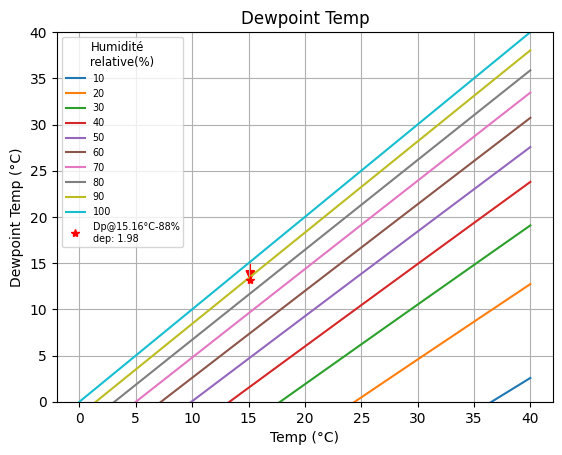

In [ ]:
# dewpoint
x = np.linspace(0,40,10)
for hum in np.linspace(0.1,1.,10):
    y = dewpoint(x,hum)[0]
    #x,y
    plt.plot(x,y,label=f'{hum*100:.0f}')
    #plt.legend(fontsize='small',title_fontsize='small')
plt.grid()


hum = current['humidity']/100
T = current['temp']
dp = dewpoint(T,hum)[0]  # dewpoint at current T,hum 
depression = dewpoint(T,hum)[1]  # dew depression at current T,hum
saturation = dewpoint(T,1)[0]  # dewpoint @ T for humidity=100% = T
# show '*' for dewpoint present temp,hum
plt.plot(T,dewpoint(T,hum)[0],'r*',label=f'Dp@{T}°C-{int(hum*100)}%\ndep:{depression:5.2f}')
# show arrow for dewpoint depression = T-Tr at current temp,hum
# arrow (x,y,dx,dy)
plt.arrow(T,T,0,-T+dp,shape='full',head_width = 0.75,head_starts_at_zero=False, length_includes_head=True,fc='red',ec='red',head_length=1)
plt.legend(title='Humidité\nrelative(%)',loc=2,fontsize='x-small',title_fontsize='small')
plt.title('Dewpoint Temp')
plt.xlabel('Temp (°C)')
plt.ylabel('Dewpoint Temp (°C)')
plt.ylim(0,40)

print(f'T: {T}, Hum: {hum}\nDewpoint: {dp}\nDepression: {depression:5.2f}')

In [ ]:
hum,saturation,T

(0.88, 15.16, 15.16)

(15.16, 0.88, 15.16, 13.18, 1.98, 'pluie')

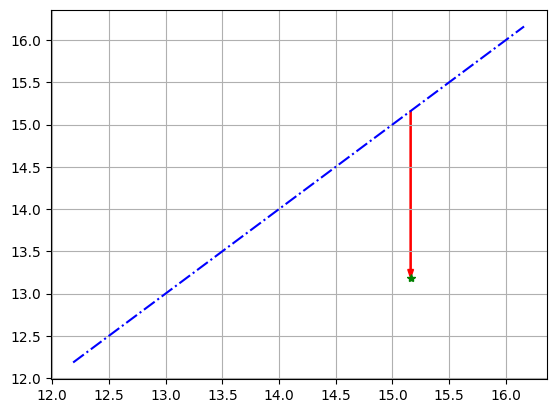

In [ ]:
plt.plot(T,dp,'*',c='green')
plt.plot((dp-1,saturation+1),(dp-1,saturation+1),'b-.')
plt.grid()
plt.arrow(T,T,0,-(T-dp),shape='full',width=0.01,head_width = 0.05,head_starts_at_zero=False, length_includes_head=True,fc='red',ec='red',head_length=0.1)

# saturation : humidity=100%
depression= T-dp
T,hum,saturation,round(dp,2),round(depression,2),'pluie' if T-dp<5 else 'beau temps'  #saturation = T

# Dew depression : T - Tr
Plus cette valeur est petite, plus l’humidité relative à cette altitude est grande et plus la présence de nuages est probable. 

Ainsi, une dépression de plus de 5 °C est en général associée avec l'absence de couche nuageuse et une valeur près de 0 °C est synonyme d'une couverture complète. 

(0.0, 40.0)

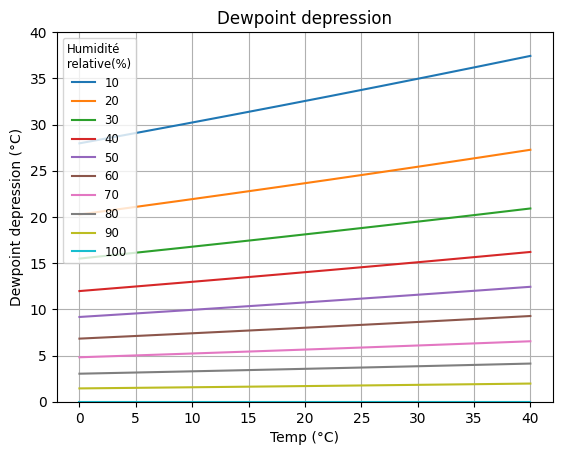

In [ ]:
# dewpoint
x = np.linspace(0,40,10)
for hum in np.linspace(0.1,1.,10):
    y = dewpoint(x,hum)[1]
    #x,y
    plt.plot(x,y,label=f'{hum*100:.0f}')
    plt.legend(title='Humidité\nrelative(%)',loc=2,fontsize='small',title_fontsize='small')
plt.grid()
plt.title('Dewpoint depression')
plt.xlabel('Temp (°C)')
plt.ylabel('Dewpoint depression (°C)')
plt.ylim(0,40)

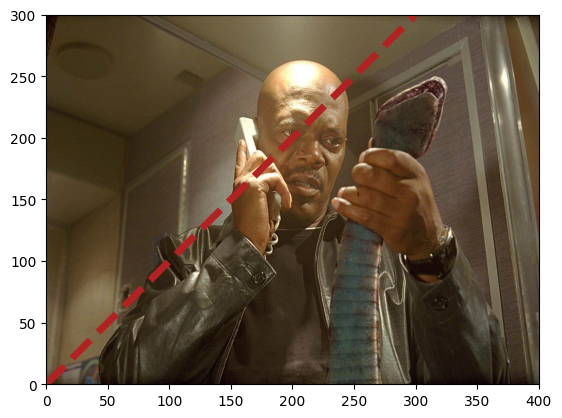

In [ ]:

img = plt.imread("snakes-plane.jpg")    # don't work with svg files
fig, ax = plt.subplots()
x = range(300)
ax.imshow(img, extent=[0, 400, 0, 300])
ax.plot(x, x, '--', linewidth=5, color='firebrick')

https://www.w3schools.com/colors/colors_names.asp

In [ ]:
%%html
<style>
* {
   color: white !important;
   background : MidnightBlue;
}
</style>

![Dewpoint](Dewpoint-RH-fr.svg)

![Diagramme binaire Liquide Vapeur](Diagramme_binaire_liquide-vapeur.svg)

Le <b>gradient thermique adiabatique</b> est, dans l'atmosphère terrestre, la variation de température de l'air avec l'altitude, autrement dit le gradient de la température de l'air, qui ne dépend que de la pression atmosphérique, c'est-à-dire :

- sans considération d'échange de chaleur avec l'environnement (autres masses d'air, relief) ;<br>
- sans considération de condensation (formation de nuages) ni de précipitations.

![Rain_shadow_effect](Rain_Shadow_Effect_caused_by_Orographic_Lift.png)

Supposons un vent sec parallèle au sol qui rencontre un obstacle du relief (colline, montagne). L'air suit le relief et s'élève, il subit donc une détente qui le refroidit. Puis, lorsque l'air redescend sur l'autre versant, il se réchauffe. Si l'opération a été suffisamment rapide, l'air n'a pas échangé de chaleur avec l'obstacle ni avec l'air d'altitude, il se retrouve donc à la même température de l'autre côté.

Maintenant, si l'humidité de l'air est assez importante, l'eau va se condenser en montant. Deux scénarios peuvent se produire :

1. s'il ne pleut pas sur le côté face au vent, en redescendant, l'air se réchauffe et donc les gouttelettes d'eau s'évaporent à nouveau. La chaleur libérée par la liquéfaction en montant est réabsorbée par l'évaporation en descendant, l'air a donc également la même température de l'autre côté du versant ;<br><br>
2. s'il pleut au sommet de la montagne, cela change les conditions, l'air a perdu une partie de son humidité au sommet de la montagne. Il y a donc moins d'eau qui s'évapore et ainsi moins de chaleur absorbée : à altitude égale, l'air de l'autre côté du versant est donc plus chaud.

In [ ]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO


html = requests.get("https://fr.wikipedia.org/wiki/Gradient_thermique_adiabatique").text.replace(',','.').replace('−','-').replace('- ','-')
html=StringIO(html)

In [ ]:
cols= ["altitude(km)",	
"pression(hPa)",
"température(K)",	
"température(°C)",	
"dp(hPa)",	
"dp/p(sans unité)",	
"dT/T(sans unité)",	
"dT(K)"]

In [ ]:
data = pd.read_html(html)
len(data), data


(4,
 [    altitude  (km)  pression  (hPa)  température  (K)  température (°C)  \
  0              0.0             1013            288.15             15.00   
  1              0.5              955            283.44             10.29   
  2              1.0              900            278.77              5.62   
  3              1.5              845            273.90              0.75   
  4              2.0              794            269.18             -3.97   
  5              2.5              746            264.53             -8.62   
  6              3.0              700            259.87            -13.28   
  7              3.5              658            255.42            -17.73   
  8              4.0              617            250.87            -22.80   
  9              5.0              541            242.04            -33.11   
  10             6.0              471            233.09            -42.06   
  11             7.0              411            224.61            -50.5

In [ ]:
data[0]['température (°C)']

0     15.00
1     10.29
2      5.62
3      0.75
4     -3.97
5     -8.62
6    -13.28
7    -17.73
8    -22.80
9    -33.11
10   -42.06
11   -50.54
12   -56.97
13   -63.47
14   -75.53
15   -83.71
16   -91.66
Name: température (°C), dtype: float64

In [ ]:
data[0].columns

Index(['altitude  (km)', 'pression  (hPa)', 'température  (K)',
       'température (°C)', '(hPa)', '(sans unité)', '(sans unité).1', '(K)'],
      dtype='object')

In [ ]:
data[0].columns=cols
#data[0].set_axis(cols, axis="columns", inplace=True) 

In [ ]:
model1 = data[0]
model1

,altitude(km),pression(hPa),température(K),température(°C),dp(hPa),dp/p(sans unité),dT/T(sans unité),dT(K)
0,0.0,1013,288.15,15.00,NaN,NaN,NaN,NaN
1,0.5,955,283.44,10.29,-58.0,-0.057,-0.016,-4.71
2,1.0,900,278.77,5.62,-55.0,-0.058,-0.016,-4.66
3,1.5,845,273.90,0.75,-55.0,-0.061,-0.017,-4.87
4,2.0,794,269.18,-3.97,-51.0,-0.060,-0.017,-4.72
5,2.5,746,264.53,-8.62,-48.0,-0.060,-0.017,-4.65
6,3.0,700,259.87,-13.28,-46.0,-0.062,-0.018,-4.66
7,3.5,658,255.42,-17.73,-42.0,-0.060,-0.017,-4.45
8,4.0,617,250.87,-22.80,-41.0,-0.062,-0.018,-4.55
9,5.0,541,242.04,-33.11,-76.0,-0.123,-0.035,-8.83


In [ ]:
cols= ["altitude(km)",	
"pression(hPa)",
"température(K)",		
"dp(hPa)",	
"dp/p(sans unité)",	
"dT/T(sans unité)",	
"dT(K)"]

In [ ]:
model2 = data[1]
model2.columns=cols
model2

,altitude(km),pression(hPa),température(K),dp(hPa),dp/p(sans unité),dT/T(sans unité),dT(K)
0,0.0,1013,288.15,NaN,NaN,NaN,NaN
1,0.5,955,282.15,-58.0,-0.057,-0.016,-4.71
2,1.0,900,280.15,-55.0,-0.058,-0.016,-4.64
3,1.5,845,278.15,-55.0,-0.061,-0.017,-4.89
4,2.0,794,275.15,-51.0,-0.060,-0.017,-4.80
5,2.5,746,272.15,-48.0,-0.060,-0.017,-4.75
6,3.0,700,270.15,-46.0,-0.062,-0.018,-4.79
7,3.5,658,267.15,-42.0,-0.060,-0.017,-4.63
8,4.0,617,263.15,-41.0,-0.062,-0.018,-4.76
9,5.0,541,257.15,-76.0,-0.123,-0.035,-9.26


In [ ]:
data

[    altitude(km)  pression(hPa)  température(K)  température(°C)  dp(hPa)  \
 0            0.0           1013          288.15            15.00      NaN   
 1            0.5            955          283.44            10.29    -58.0   
 2            1.0            900          278.77             5.62    -55.0   
 3            1.5            845          273.90             0.75    -55.0   
 4            2.0            794          269.18            -3.97    -51.0   
 5            2.5            746          264.53            -8.62    -48.0   
 6            3.0            700          259.87           -13.28    -46.0   
 7            3.5            658          255.42           -17.73    -42.0   
 8            4.0            617          250.87           -22.80    -41.0   
 9            5.0            541          242.04           -33.11    -76.0   
 10           6.0            471          233.09           -42.06    -70.0   
 11           7.0            411          224.61           -50.5

In [ ]:
#model1 = data[0]
#model2 = data[1]
gradient = data[2]
gradient


Altitude (km) Gradient thermique adiabatique (°C/km)           \
   Altitude (km)                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
   Gradient thermique du modèle OACI (°C/km)         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [ ]:
level0 = gradient.columns.levels[0]
level1 = gradient.columns.levels[1]
level0, level1
# level1.columns (6 columns) is equivalent to : {0:level1[0], 1:level1[2], 2:level1[3], 3:level1[1], 4:level1[2], 5:level1[3]}

(Index(['Altitude (km)', 'Gradient thermique adiabatique (°C/km)',
        'Gradient thermique du modèle OACI (°C/km)', 'Température (°C)'],
       dtype='object'),
 Index(['Altitude (km)', 'Gradient thermique du modèle OACI (°C/km)',
        'modèle 1', 'modèle 2'],
       dtype='object'))

In [ ]:
cols=[".","..","modèle 1","modèle 2"]

In [ ]:
#rename level 1 (inplace=True) deprecated with set_levels()
gradient.columns = gradient.columns.set_levels(cols,level=1)

In [ ]:
gradient

Altitude (km) Gradient thermique adiabatique (°C/km)           \
               .                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
                                          ..         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [ ]:
keys=model1.keys()
keys

Index(['altitude(km)', 'pression(hPa)', 'température(K)', 'température(°C)',
       'dp(hPa)', 'dp/p(sans unité)', 'dT/T(sans unité)', 'dT(K)'],
      dtype='object')

In [ ]:
altitude = model1[keys[0]]
pression = model1[keys[1]]
temperatureK = model1[keys[2]]
temperatureC = model1[keys[3]]


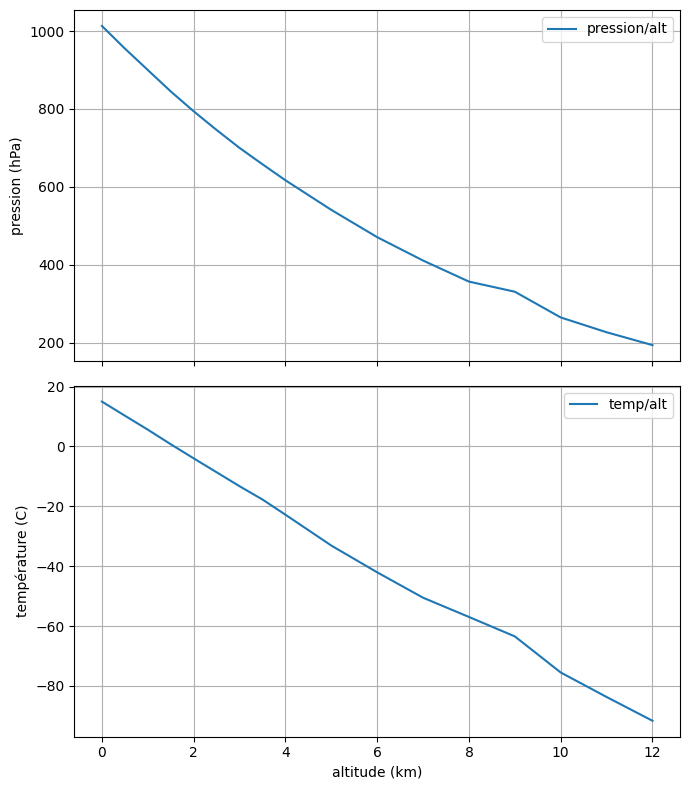

In [ ]:
fig, (ax1,ax2) = plt.subplots(2, sharex=True)
fig.set_size_inches(7, 8)
ax1.plot(altitude, pression, label='pression/alt')
plt.xlabel('altitude (km)')
ax1.set_ylabel('pression (hPa)')
ax1.legend()
ax1.grid()
ax2.plot(altitude, temperatureC, label='temp/alt')
#ax2.xlabel('altitude (km)')
ax2.set_ylabel('température (C)')
ax2.legend()
ax2.grid()
fig.tight_layout()

In [ ]:
gradient

Altitude (km) Gradient thermique adiabatique (°C/km)           \
               .                               modèle 1 modèle 2   
0            0.5                                  -9.43    -9.43   
1            1.0                                  -9.33    -9.29   
2            1.5                                  -9.73    -9.78   
3            2.0                                  -9.45    -9.59   
4            2.5                                  -9.30    -9.51   
5            3.0                                  -9.32    -9.59   
6            3.5                                  -8.91    -9.26   
7            4.0                                  -9.09    -9.51   
8            5.0                                  -8.83    -9.26   
9            6.0                                  -8.95    -9.51   
10           7.0                                  -8.48    -9.10   
11           8.0                                  -8.43    -9.09   
12           9.0                                  -4.50    -4.89   
13          10.0                                 -12.06   -13.23   
14          11.0                                  -8.18    -9.10   
15          12.0                                  -7.95    -9.06   

   Gradient thermique du modèle OACI (°C/km) Température (°C)           
                                          ..         modèle 1 modèle 2  
0                                       -6.5               10        9  
1                                       -6.5                9        7  
2                                       -6.5                1        5  
3                                       -6.5               -4        2  
4                                       -6.5               -9       -1  
5                                       -6.5              -13       -3  
6                                       -6.5              -18       -6  
7                                       -6.5              -22      -10  
8                                       -6.5              -31      -16  
9                                       -6.5              -40      -23  
10                                      -6.5              -49      -31  
11                                      -6.5              -57      -38  
12                                      -6.5              -61      -41  
13                                      -6.5              -74      -51  
14                                      -6.5              -82      -55  
15                                      -6.5              -90      -56

In [ ]:
gradient.keys()

MultiIndex([(                            'Altitude (km)',        '.'),
            (   'Gradient thermique adiabatique (°C/km)', 'modèle 1'),
            (   'Gradient thermique adiabatique (°C/km)', 'modèle 2'),
            ('Gradient thermique du modèle OACI (°C/km)',       '..'),
            (                         'Température (°C)', 'modèle 1'),
            (                         'Température (°C)', 'modèle 2')],
           )

In [ ]:
g_keys = gradient.keys()
g_alt = gradient[g_keys[0]]
g_model1 = gradient[g_keys[1]]
g_model2 = gradient[g_keys[2]]
#g_model1,g_model2

#gradient.info()

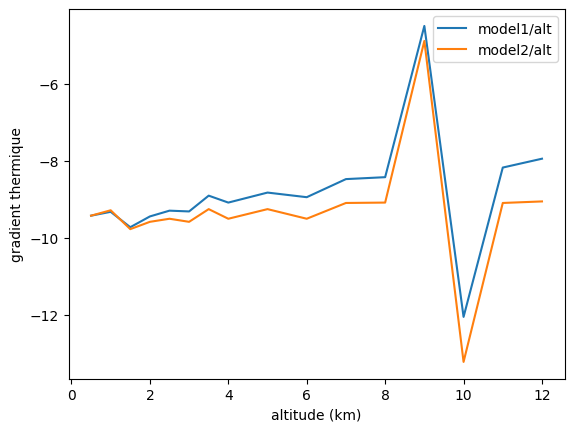

In [ ]:
plt.plot(g_alt, g_model1, label='model1/alt')
plt.plot(g_alt, g_model2, label='model2/alt')
plt.xlabel('altitude (km)')
plt.ylabel('gradient thermique')
plt.legend()

In [ ]:
#API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
API_Key = 'c9d926a9549ae7933324ef26e13bb200'
#API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
city = 'paris'
base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
current = requests.get(base_url).json()
current

{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 288.62,
  'feels_like': 288.49,
  'temp_min': 287.04,
  'temp_max': 289.5,
  'pressure': 1011,
  'humidity': 87,
  'sea_level': 1011,
  'grnd_level': 1001},
 'visibility': 10000,
 'wind': {'speed': 1.03, 'deg': 220},
 'clouds': {'all': 0},
 'dt': 1725566308,
 'sys': {'type': 2,
  'id': 2012208,
  'country': 'FR',
  'sunrise': 1725513215,
  'sunset': 1725560715},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [ ]:
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
forecast = requests.get(base_url).json()
# 40 items (every 3 hours for 5 days)
forecast['list'][0:2]

[{'dt': 1725570000,
  'main': {'temp': 15.16,
   'feels_like': 15.03,
   'temp_min': 15.16,
   'temp_max': 16.61,
   'pressure': 1011,
   'sea_level': 1011,
   'grnd_level': 1002,
   'humidity': 88,
   'temp_kf': -1.45},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}],
  'clouds': {'all': 0},
  'wind': {'speed': 0.9, 'deg': 161, 'gust': 0.94},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2024-09-05 21:00:00'},
 {'dt': 1725580800,
  'main': {'temp': 15.5,
   'feels_like': 15.32,
   'temp_min': 15.5,
   'temp_max': 16.18,
   'pressure': 1011,
   'sea_level': 1011,
   'grnd_level': 1002,
   'humidity': 85,
   'temp_kf': -0.68},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03n'}],
  'clouds': {'all': 33},
  'wind': {'speed': 0.9, 'deg': 145, 'gust': 0.99},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2024-09-06 00:00:00'}]

In [ ]:
API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'  # this works for onecall!!

# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
onecall_data = requests.get(url = base_url, headers = headers).json()
onecall_data

{'lat': 48.8534,
 'lon': 2.3488,
 'timezone': 'Europe/Paris',
 'timezone_offset': 7200,
 'current': {'dt': 1725566804,
  'sunrise': 1725513215,
  'sunset': 1725560715,
  'temp': 15.16,
  'feels_like': 15.03,
  'pressure': 1011,
  'humidity': 88,
  'dew_point': 13.19,
  'uvi': 0,
  'clouds': 0,
  'visibility': 10000,
  'wind_speed': 1.03,
  'wind_deg': 220,
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}]},
 'daily': [{'dt': 1725534000,
   'sunrise': 1725513215,
   'sunset': 1725560715,
   'moonrise': 1725521640,
   'moonset': 1725563340,
   'moon_phase': 0.07,
   'temp': {'day': 15.31,
    'min': 15.16,
    'max': 19.65,
    'night': 15.45,
    'eve': 15.78,
    'morn': 15.6},
   'feels_like': {'day': 15.32, 'night': 15.3, 'eve': 15.61, 'morn': 15.51},
   'pressure': 1009,
   'humidity': 93,
   'dew_point': 13.92,
   'wind_speed': 4.41,
   'wind_deg': 286,
   'wind_gust': 10.31,
   'weather': [{'id': 502,
     'main': 'Rain',
     'desc